## Observations and Insights 

Inferences and Observations
1. The weight of the mouse and the tumor  volume is correlated an inference that can be made from this is that the reason the weight decreases is due to the decrease in tumor volume as there is a positive linear relationship between the tumor volume and weight.
2. Capomulin and Ramicane were the most effective drugs as they had the lowest final tumor volume with minimum variation between the mice treated even though they had the most amount of mice treated.
3. Sex did not play a factor in the effectiveness of the drugs to treat the tumors.
4. There was no data sckewing the results


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
idtp_duplicates =combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
idtp_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates =combined_df[combined_df.duplicated(["Mouse ID"])]
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_df.drop_duplicates(subset="Mouse ID", keep = "last" )
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#calculate each seperately using groupby
mean= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#create summary table
stats_sum= pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation":std_dev, "SEM":sem})
print(f"{stats_sum}")

# Using the aggregation method, produce the same summary statistics in a single line
aggragate_results=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median',Variance ='var', Standard_Deviation = 'std', SEM ='sem')
print(f"{aggragate_results}")                                                           



                   Mean     Median    Variance  Standard Deviation       SEM
Drug Regimen                                                                
Capomulin     36.667568  38.125164   32.663378            5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735            8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875            8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330            9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927           10.297083  2.059417
Placebo       60.508414  62.030594   78.759797            8.874672  1.774934
Propriva      56.736964  55.841410   69.349002            8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354            5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586            9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027            8.767099  1.753420
                   Mean     Median    Variance  Standard_Deviation       SEM

## Bar and Pie Charts

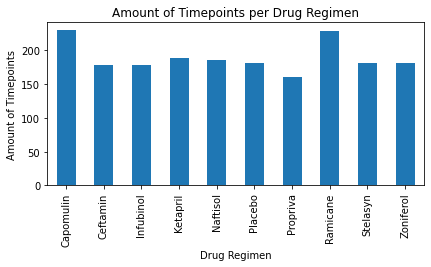

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#create a new dataframe for timepoint and drug Regimens
drug_timepoint_data = pd.DataFrame(combined_df.groupby("Drug Regimen")["Timepoint"].count())

#make plot of Data frame 
drug_timepoint_data.plot(kind="bar",xlabel ="Drug Regimen", ylabel = "Amount of Timepoints", figsize = (6.75,3), legend=False)
#add title
plt.title("Amount of Timepoints per Drug Regimen")
plt.show()

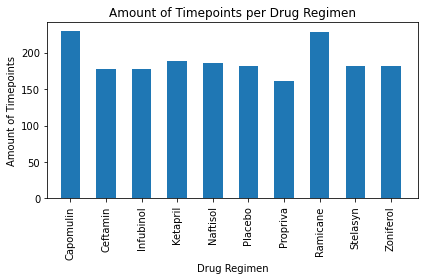

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#reset the index for Matplotlib plot so that Drug regimen and timepoint are columns 
drug_timepoint_data = pd.DataFrame(combined_df.groupby("Drug Regimen")["Timepoint"].count()).reset_index()
#define drug regimen as a list from the column to use as the x axis
drug_regimen = drug_timepoint_data["Drug Regimen"]
#define amount of timepoints as a list from the column to use as the y axis
amount_timepoint = drug_timepoint_data["Timepoint"]
#make the plot
plt.bar(drug_regimen,amount_timepoint, width= 0.55)
#add a title
plt.title("Amount of Timepoints per Drug Regimen")
#Add X axis label
plt.xlabel("Drug Regimen")
#add Y axis label
plt.ylabel("Amount of Timepoints")
#rorate the angle of the x ticker so it can be read
plt.xticks(rotation=90)
#adjust the graph size to match the previous plot
plt.xlim(-0.65, 9.75,-0.35)

plt.tight_layout()
plt.show()

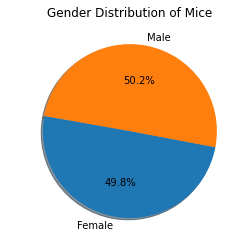

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#make a dataframe using group by of the sex and amount of mouse ID's for each
gender_count =pd.DataFrame(clean_df.groupby("Sex")["Mouse ID"].count())
#make the plot using pandas
gender_count.plot(kind="pie", y = "Mouse ID",startangle=170, autopct = '%1.1f%%', legend=False, shadow=True)
#add the title
plt.title("Gender Distribution of Mice")
#remove the label for Mouse ID
plt.ylabel(" ")
plt.show()

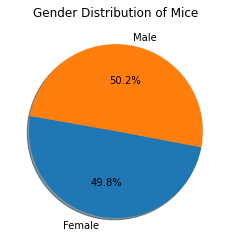

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#reset the index of the sex and amount of mouse ID df so that each is a column that ccan be called on for the graph
gender_count=gender_count.reset_index()
plt.pie(gender_count["Mouse ID"], labels=gender_count["Sex"], startangle=170,autopct="%1.1f%%", shadow=True)
#add the title
plt.title("Gender Distribution of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Final tumor volume was already found for clean_df us a conditional statement to find the specific treatment regiments in clean_df
four_regimens = clean_df[(clean_df["Drug Regimen"]=="Capomulin") | (clean_df["Drug Regimen"]=="Ramicane") | (clean_df["Drug Regimen"]=="Infubinol") | (clean_df["Drug Regimen"]=="Ceftamin")]
#put them in ascending order
four_regimens = four_regimens.sort_values(by = 'Tumor Volume (mm3)')
four_regimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug=['Caponulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Calculate the quantiles
quartiles= four_regimens["Tumor Volume (mm3)"].quantile([.25,.5,.75])
#find the lowest quantile value
lowq = quartiles[0.25]
print(f"{lowq}")
#find the highest quantile value
highq = quartiles[0.75]
print(f"{highq}")
#find the IQR by subtracting the high and low quantile values
iqr = highq - lowq
print(f"{iqr}")
#find the low bound for an outlier
lower_bound = lowq - (1.5*iqr)
print(f"{lower_bound}")
#fins the high bound for an outlier
upper_bound = highq + (1.5*iqr)
print(f"{upper_bound}")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
four_regimens.head()
    
    # add subset 
tumor_drug = four_regimens[["Drug Regimen", "Tumor Volume (mm3)"]]  
tumor_drug
    
    # Determine outliers using upper and lower bounds #no outliers were found which is why the table was desplayed to be empty
tumor_outlier = tumor_drug.loc[(tumor_drug["Tumor Volume (mm3)"] < lower_bound) | (tumor_drug["Tumor Volume (mm3)"] > upper_bound)]
tumor_outlier

37.1877438025
59.930261755
22.742517952499995
3.0739668737500097
94.04403868374999


,Drug Regimen,Tumor Volume (mm3)


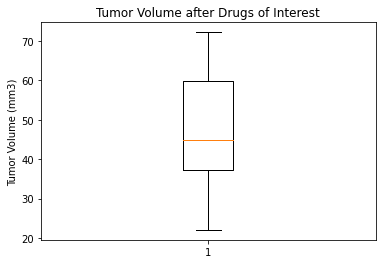

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors= four_regimens[["Tumor Volume (mm3)"]]
fig, ax = plt.subplots()
#add a title
ax.set_title('Tumor Volume after Drugs of Interest')
#add y axis label
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumors)
# the box plot also did not show any outliers same as the table above
plt.show()

## Line and Scatter Plots

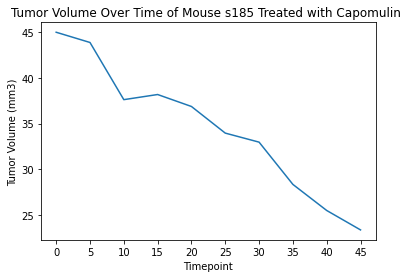

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#make a new data frame using a conditional statement that only shows results for one mouse which was on Capomulin
s185_tumor = combined_df[(combined_df["Mouse ID"]=="s185")]
#define timepoint from the data frame to use as the x 
timepoint = s185_tumor[["Timepoint"]]
#define the tumor volume from data frame to use as the y 
tumor_vol = s185_tumor[["Tumor Volume (mm3)"]]
#make line plot
plt.plot(timepoint , tumor_vol)
#add y label
plt.ylabel("Tumor Volume (mm3)")
#add x label
plt.xlabel("Timepoint")
#add title
plt.title("Tumor Volume Over Time of Mouse s185 Treated with Capomulin ")
#adjust the ticks on the graph
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.show()

<ipython-input-17-5180d89ca8b7>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_cap = clean_df[(combined_df["Drug Regimen"]=="Capomulin")]


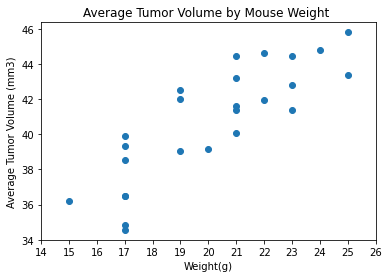

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#make new data frame for only Capomulin results
capomulin= combined_df[(combined_df["Drug Regimen"]=="Capomulin")]
#calculate the mean of Tumor Volume for each mouse that too Capomulin
capomulin= capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#make it a data frame
capomulin_df = pd.DataFrame(capomulin)
#rename column to be Average tumor volume
capomulin_df= capomulin_df.rename(columns ={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
#make another data frame by grouping by Capomulin  to get the rest of the information
clean_cap = clean_df[(combined_df["Drug Regimen"]=="Capomulin")]
#set the indext to be mouse ID so it matches the capomulin df
clean_cap = clean_cap.set_index('Mouse ID')
#merge two df's
capomulin_df = pd.merge(capomulin_df, clean_cap, left_index=True, right_index=True)

#define the weight from the data frame column for the x
weight= capomulin_df[["Weight (g)"]]
#define tumor volume from the data frame column for the y
tumor_vol_cap = capomulin_df[["Average Tumor Volume (mm3)"]]
#make scatter plot
plt.scatter(weight, tumor_vol_cap)
#add x label
plt.xlabel("Weight(g)")
#add y label
plt.ylabel("Average Tumor Volume (mm3)")
#add title
plt.title("Average Tumor Volume by Mouse Weight ")
#adjust the x tick marks on the graph
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.show()


## Correlation and Regression

 The correlation between both factors is 0.84
y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


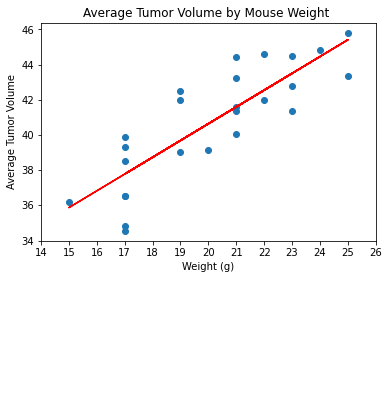

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#make data frame for correlation coefficent data
correlation_coefficent = capomulin_df[["Weight (g)", "Average Tumor Volume (mm3)"]]
#define variables from dataframe
weight = correlation_coefficent["Weight (g)"]
tumor_vol_cor = correlation_coefficent["Average Tumor Volume (mm3)"]
#find and print correlation coefficent
correlation = st.pearsonr(weight,tumor_vol_cor)
print(f" The correlation between both factors is {round(correlation[0],2)}")
#find linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol_cor)
regress_values = weight* slope + intercept
#get and print the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")
#plot the graph with the linear regression included
plt.scatter(weight,tumor_vol_cor)
plt.plot(weight,regress_values,"r-")
#add the linear regression line
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
#add the graph details 
plt.title("Average Tumor Volume by Mouse Weight ")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
#adjust the ticks to match the previous graph
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26])
#print the r squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()